In [1]:
# Code up an iterative procedure that allows you to calculate a 
# new r = r1 and theta = theta1 starting from the periastron point 
# r0 = a(1-e) at initial time t = 0 and initial angle theta_0 = 0
# This procedure should allow you to calculate r and theta at each 
# time-step covering a full orbital period of a planet.


import numpy as np
import matplotlib.pyplot as plt  
import scipy.constants as sci



In [2]:
def calc_temps(temperature, smo_int):
    avg_temp = np.zeros(temperature.size)
    j = 0
    #print(temperature.size)
    while j < temperature.size:

        if j - smo_int < 0:
            sub = np.append(temperature[j-smo_int:],temperature[:j+smo_int])
        elif j + smo_int > temperature.size:
            sub = np.append(temperature[j-smo_int:],temperature[:j+smo_int-temperature.size])
        else:
            sub = temperature[j-smo_int:j+smo_int]

        avg_temp[j] = np.average(sub)

        j += 1
    return avg_temp

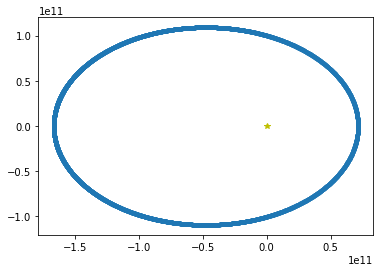

In [3]:
### Question 1


fig,ax = plt.subplots()

## Initial Values
a = 0.8*1.49 * 10**11 # meters #20. # 1.496e+11 # semi major axis ## one AU
e = 0.4 # eccentricity
theta = 0.

# Constants
M = 2*10**30 #kg ## Mass of Star
#m_planet = 6.0*10**24 #kg ## Mass of Planet
G = 6.67408*10**-11 #6.67408 × 10-11 m3 kg-1 s-2 ## Gravitational Constant

Lsun = 3.83*10**26 # Watts ## Luminosity of Star
albedo = 0.3

itern = 5000 ## Number of iterations

## Find the Period
period = (4 * (np.pi)**2 * a**3 / (G * M))**(1/2.) ## how long it takes to go around star 
## Find specific momentum
L = (G*M*a*(1.-e**2))**(1/2.)


#a^3 / T^2 = GM/4pi^2
#T^2 = 4pi^2 a^3 / GM

steps = np.linspace(0,period,itern)
x = np.zeros(itern)
y = np.zeros(itern)
temperature = np.zeros(itern) # temperature
Temp_init = (Lsun*(1-albedo)/(16*np.pi*sci.sigma*a**2))**(1/4)

del_T = period / itern

t=0

while t < itern:
    ## Find new radius and theta
    r = a * (1 - e**2) / (1 + e * np.cos(theta))
    del_theta = L * del_T / r**2
    theta = theta + del_theta
    
    ## Find new location
    x[t] = r*np.cos(theta)
    y[t] = r*np.sin(theta)
    
    # Find equilibrium temperature, for Q2
    temperature[t] = (Lsun*(1-albedo)/(16*np.pi*sci.sigma*r**2))**(1/4)
    
    # Next Iteration
    t += 1

    
    
plt.plot(x, y, ".")
plt.plot(0,0,"y*")


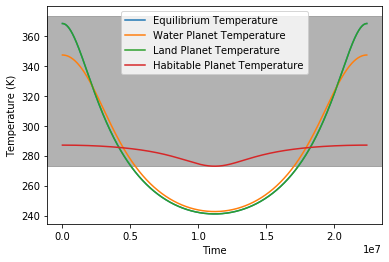

In [4]:
#### Question 2

smooth = 1#*4  # 1/2 months to smooth over 
            # value of 1 for water (2 months total)
    ## 4 times the heat capacity of water keeps the exoplanet in the habitable zone year round

## Number of iterations corresponding to interval being averaged
smo_int = int((itern / period * 30*24*60*60 * smooth))
avg_temp = calc_temps(temperature, smo_int)

smooth_2 = 1. / 40. # smoothing due to a planet made of only land
smo_int_2 = int((itern / period * 30*24*60*60 * smooth_2))
avg_temp_2 = calc_temps(temperature, smo_int_2)
## A planet made out of land would better fit the equilibrium temperature

smooth_3 = 1. * 3.87 # smoothing to make a habitable planet
smo_int_3 = int((itern / period * 30*24*60*60 * smooth_3))
avg_temp_3 = calc_temps(temperature, smo_int_3)
## Only a planet made of something like ammonia or hydrogen could possibly have a heat capacity high enough
## Materials with a heat capacity four times that of water (4.184 J/g/K * 4) are not common, 
## the closest is Hydrogen at 14.3 J/g/K

plt.axhspan(273.15, 373.1, color='grey',alpha=0.6)
plt.plot(steps, temperature, label="Equilibrium Temperature")
plt.plot(steps, avg_temp, label="Water Planet Temperature")
plt.plot(steps, avg_temp_2, label="Land Planet Temperature")
plt.plot(steps, avg_temp_3, label="Habitable Planet Temperature")
plt.ylabel('Temperature (K)')
plt.xlabel('Time')
plt.legend()
#ax.axspan()
#ax.set_ylim([0,15])
#plt.axhline(y=273.15)
#plt.axhline(y=373.1)



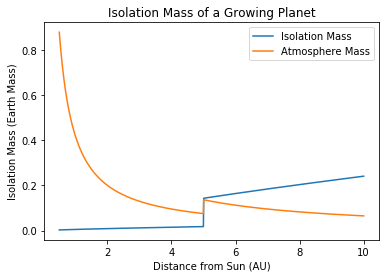

In [29]:
#### Question 3
N = 1000

M_earth = 5.97*10**27 # grams
M_star = 2*10**33 / M_earth # in earth masses
## Conversion factor of g/cm^2 to M_earth/AU^2
convert = (1.49*10**13)**2 / (M_earth) 
sigma_0 = 1.7*10**3 # g/cm^2
cove = 1.49*10**13 # cm in 1 au

r = np.linspace(0.5,10,num=N) # in AU
sigma_p = np.zeros(N)
M_iso = np.zeros(N)
M_env = np.zeros(N)
T_disk = np.zeros(N)

i = 0
while i < r.size:
    if r[i] < 5: #au  # rocky 
        sigma_p[i] = convert * 17 * r[i]**(-3/2)
        rho_m = 5 # g/cm^3
    else: # dirty ice
        sigma_p[i] = convert * 4 * 17 * r[i]**(-3/2)
        rho_m = 1.3 # g/cm^3
    M_iso[i] = 166 * convert * (M_star)**(-1/2.) * sigma_p[i]**(3/2.) * r[i]**(3)
    T_disk[i] = (6*10**9 * r[i]**(-3))**(1/4)
    M_env[i] = 1.6*10**-6 * (rho_m)**(-1/2.) * (T_disk[i])**(3/2.) * (np.log(2*rho_m*(r[i]*cove)/sigma_0))**(3/2.)       
    
    i += 1

plt.plot(r, M_iso, label="Isolation Mass")
plt.plot(r, M_env, label="Mass to hold Atmosphere")
plt.xlabel("Distance from Sun (AU)")
plt.ylabel("Isolation Mass (Earth Mass)")
plt.title("Isolation Mass of a Growing Planet")
plt.legend()
print()